In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Lets load the Boston House Pricing Dataset

In [518]:
boston_data = pd.read_csv(r'C:\Users\Chaitanya\OneDrive\Desktop\ML_projects\Boston_house_price_prediction\Boston_House_pricing\data\boston_house_prices.csv')

In [519]:
boston_data.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [520]:
new_header = boston_data.iloc[0] #grab the first row for the header
boston_data = boston_data[1:] #take the data less the header row
boston_data.columns = new_header #set the header row as the df header

In [521]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


# Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

#### convert the Dtype Object to Float

In [522]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [523]:
boston_data = boston_data.astype(float)

In [524]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Check the missing values 

In [525]:
boston_data.isnull().sum()

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [526]:
boston_data = boston_data.rename(columns={'MEDV':'PRICE'})

In [527]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Summarizing The Stats of the data

In [528]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


### EXploratory Data Analysis
### Correlation

In [529]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,,,,,,,,,,,,,,
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


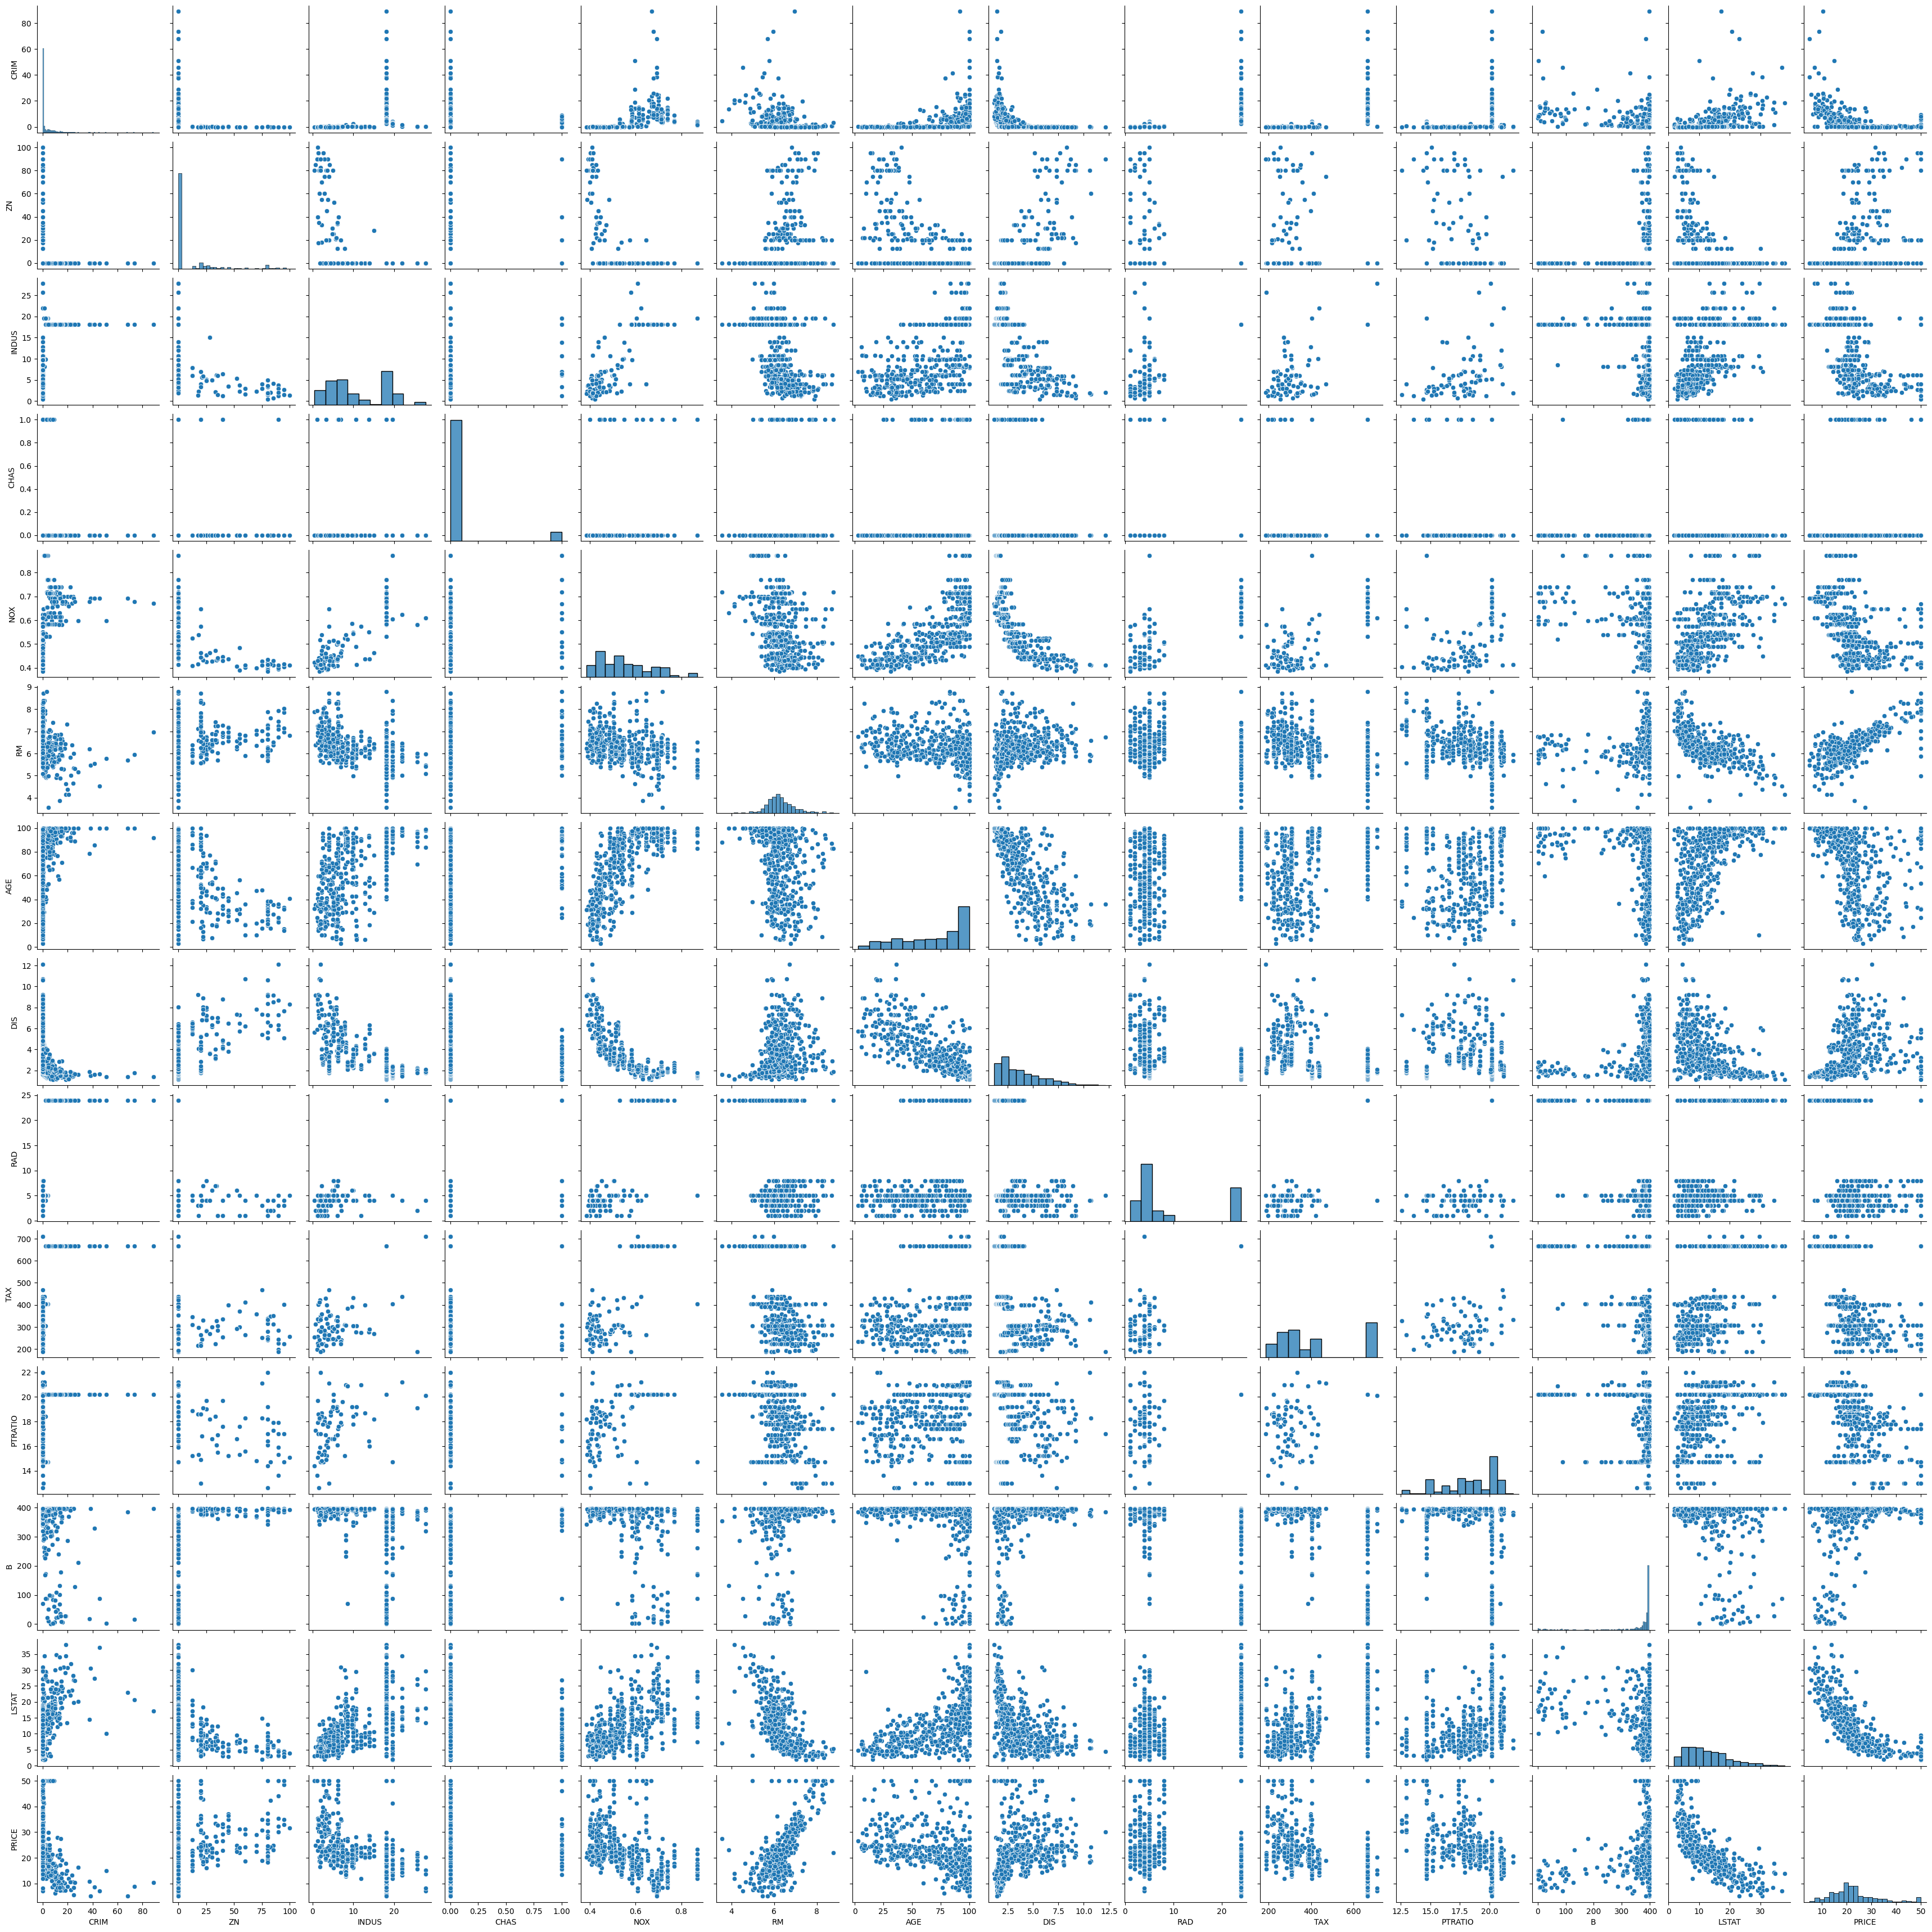

In [530]:
sns.pairplot(boston_data)

### Analyzed the Correlated Features

In [531]:
boston_data.corr().T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,,,,,,,,,,,,,,
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<Axes: xlabel='0', ylabel='0'>

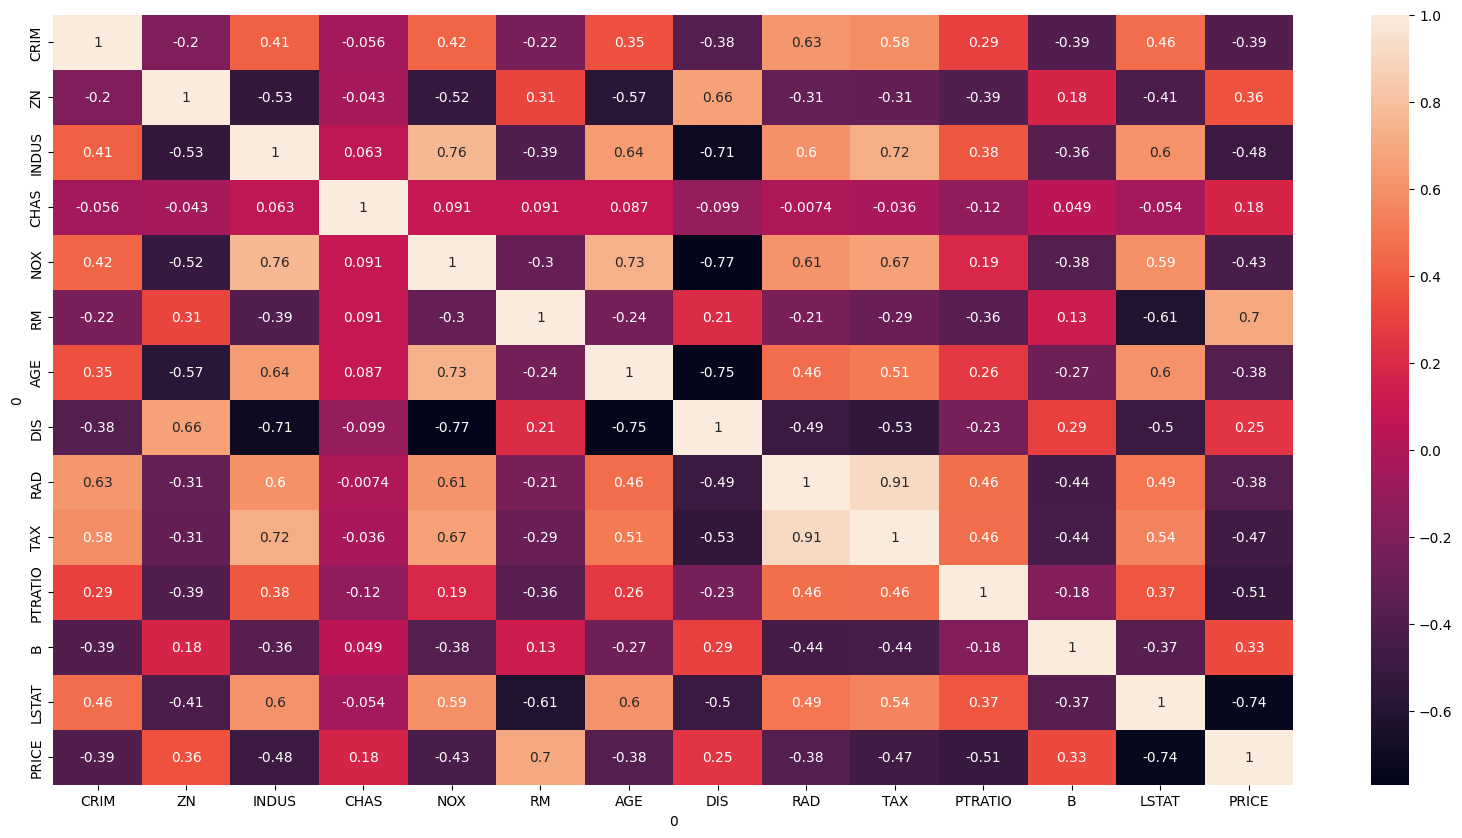

In [532]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_data.corr(),annot=True)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

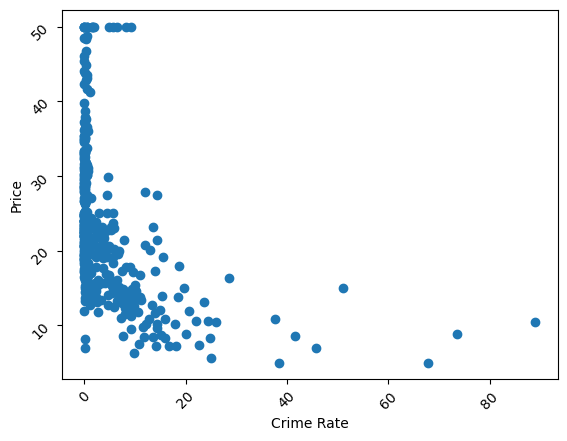

In [533]:
plt.scatter(boston_data['CRIM'],boston_data['PRICE'])
plt.xlabel("Crime Rate")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

The scatter plot reveals an inverse relationship between the crime rate and the price, indicating that as the crime rate increases, the price tends to decrease.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

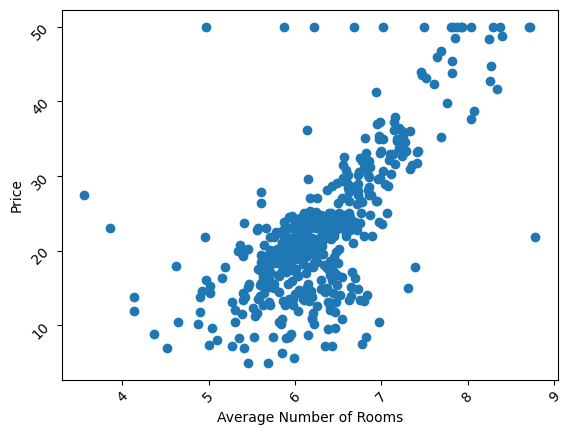

In [534]:
plt.scatter(boston_data['RM'],boston_data['PRICE'])
plt.xlabel("Average Number of Rooms")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

The scatter plot suggests a positive correlation between the number of rooms and the price, indicating that as the number of rooms increases, the price tends to rise accordingly.

<Axes: xlabel='RM', ylabel='PRICE'>

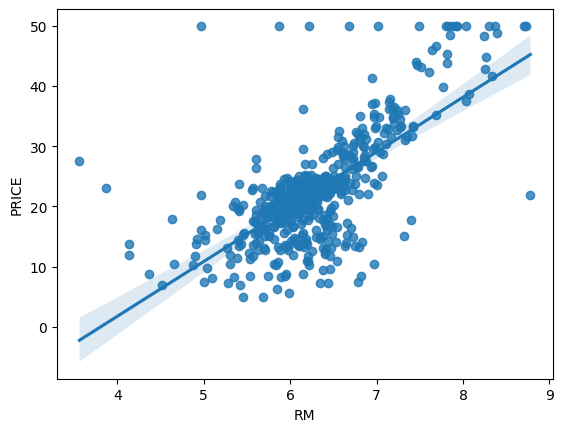

In [535]:
sns.regplot(x = 'RM', y = 'PRICE', data = boston_data)

The regression plot illustrates a positive linear relationship between the average number of rooms and the price.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

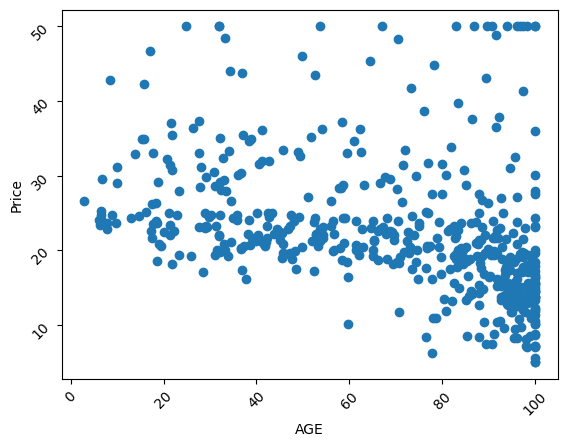

In [536]:
plt.scatter(boston_data['AGE'],boston_data['PRICE'])
plt.xlabel("AGE")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

<Axes: xlabel='AGE', ylabel='PRICE'>

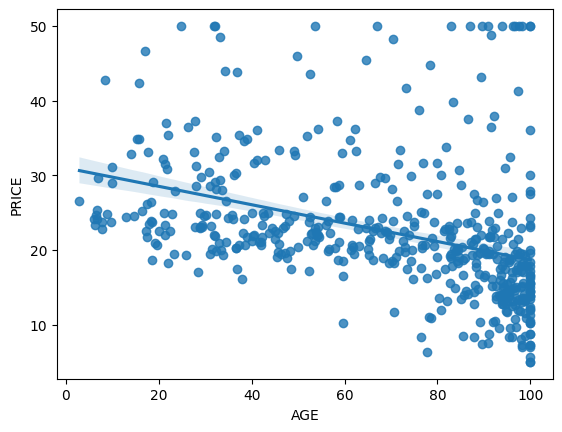

In [537]:
sns.regplot(x = 'AGE', y = 'PRICE', data = boston_data)

The proportion of older homes in a neighborhood increases, the prices of homes in that neighborhood would tend to decrease. There's a negative correlation between the age of homes and their prices in the dataset.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

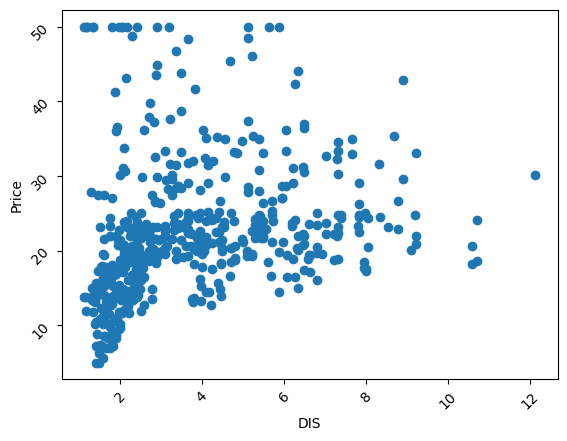

In [538]:
plt.scatter(boston_data['DIS'],boston_data['PRICE'])
plt.xlabel("DIS")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

<Axes: xlabel='DIS', ylabel='PRICE'>

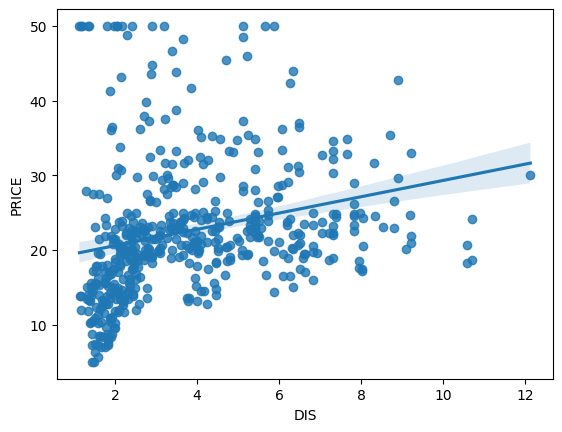

In [539]:
sns.regplot(x = 'DIS', y = 'PRICE', data = boston_data)

It indicates that as the distance to employment centers decreases, house prices tend to increase. In other words, houses closer to employment centers tend to be priced higher.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

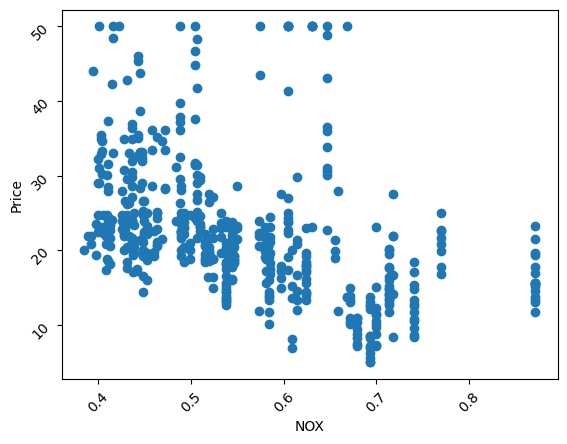

In [540]:
plt.scatter(boston_data['NOX'],boston_data['PRICE'])
plt.xlabel("NOX")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

<Axes: xlabel='NOX', ylabel='PRICE'>

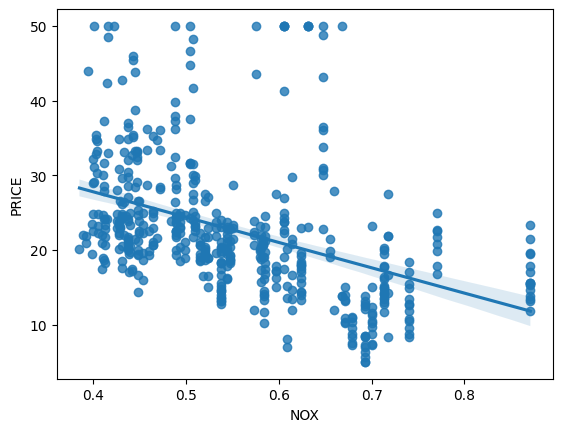

In [541]:
sns.regplot(x = 'NOX', y = 'PRICE', data = boston_data)

The above figures suggest that higher levels of air pollution are indeed associated with lower house prices in the Boston area.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

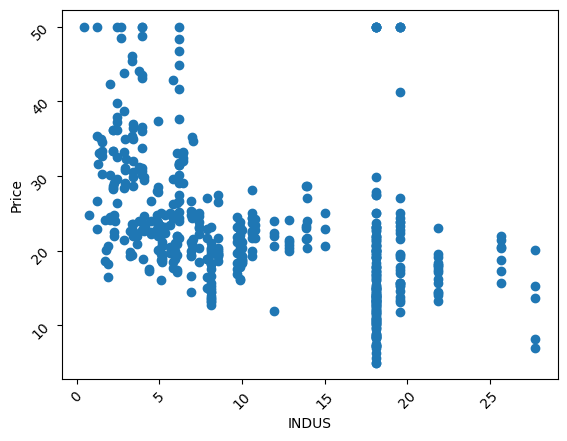

In [542]:
plt.scatter(boston_data['INDUS'],boston_data['PRICE'])
plt.xlabel("INDUS")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

<Axes: xlabel='INDUS', ylabel='PRICE'>

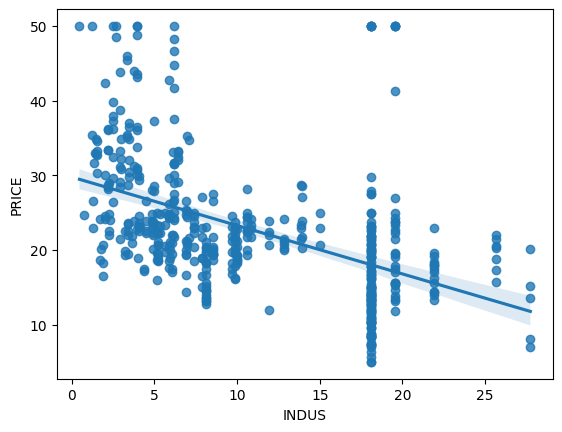

In [543]:
sns.regplot(x = 'INDUS', y = 'PRICE', data = boston_data)

It suggests that higher proportions of non-retail business land are linked to lower house prices. This might indicate that industrial areas are less desirable for residential purposes due to factors like noise, pollution, or lack of amenities.

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

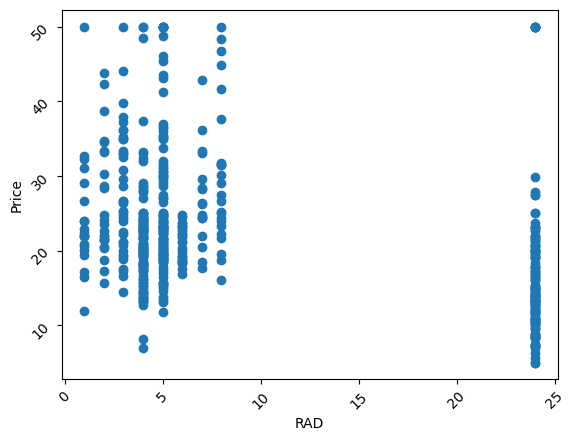

In [544]:
plt.scatter(boston_data['RAD'],boston_data['PRICE'])
plt.xlabel("RAD")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.yticks(rotation = 45)

<Axes: xlabel='RAD', ylabel='PRICE'>

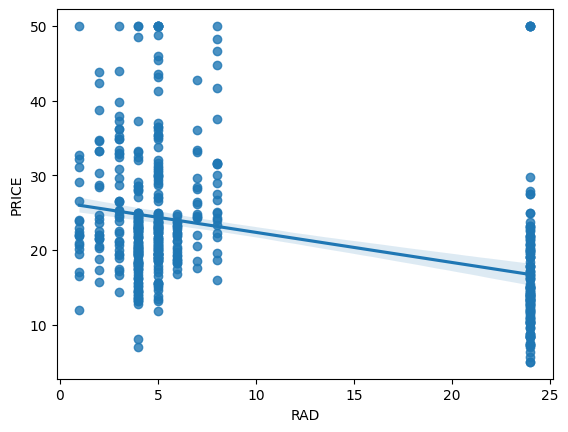

In [545]:
sns.regplot(x = 'RAD', y = 'PRICE', data = boston_data)

Houses with better highway accessibility may have higher housing prices due to increased convenience and connectivity.

Check the outliers present in the data 

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

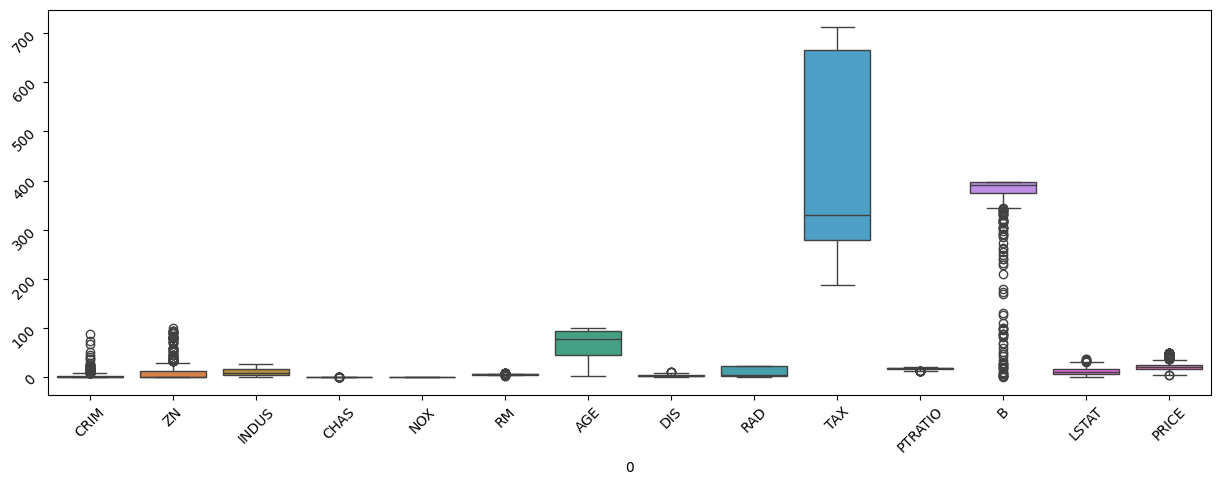

In [546]:
plt.figure(figsize=(15,5))
sns.boxplot(boston_data)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

There are many outliers present in the data we have to remove the outlier before the model development

In [547]:
def adjust_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df[column_name] = np.where(df[column_name] > upper_limit, upper_limit, df[column_name])
    df[column_name] = np.where(df[column_name] < lower_limit, lower_limit, df[column_name])
    return lower_limit, upper_limit

In [548]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'CRIM')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -5.31051125
Upper Limit: 9.06963875


In [549]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'ZN')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -18.75
Upper Limit: 31.25


In [550]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'INDUS')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -14.175
Upper Limit: 37.465


In [551]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'CHAS')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 0.0
Upper Limit: 0.0


In [552]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'NOX')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 0.18650000000000005
Upper Limit: 0.8865


In [553]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'RM')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 4.778499999999999
Upper Limit: 7.730500000000001


In [554]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'AGE')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -28.54999999999999
Upper Limit: 167.64999999999998


In [555]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'DIS')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -2.5322000000000005
Upper Limit: 9.820800000000002


In [556]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'RAD')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -26.0
Upper Limit: 54.0


In [557]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'PTRATIO')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 13.199999999999998
Upper Limit: 24.4


In [558]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'B')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 344.10624999999993
Upper Limit: 427.49625000000003


In [559]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'LSTAT')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -8.057500000000005
Upper Limit: 31.962500000000006


In [560]:
lower_limit, upper_limit = adjust_outliers(boston_data, 'PRICE')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 5.0624999999999964
Upper Limit: 36.962500000000006


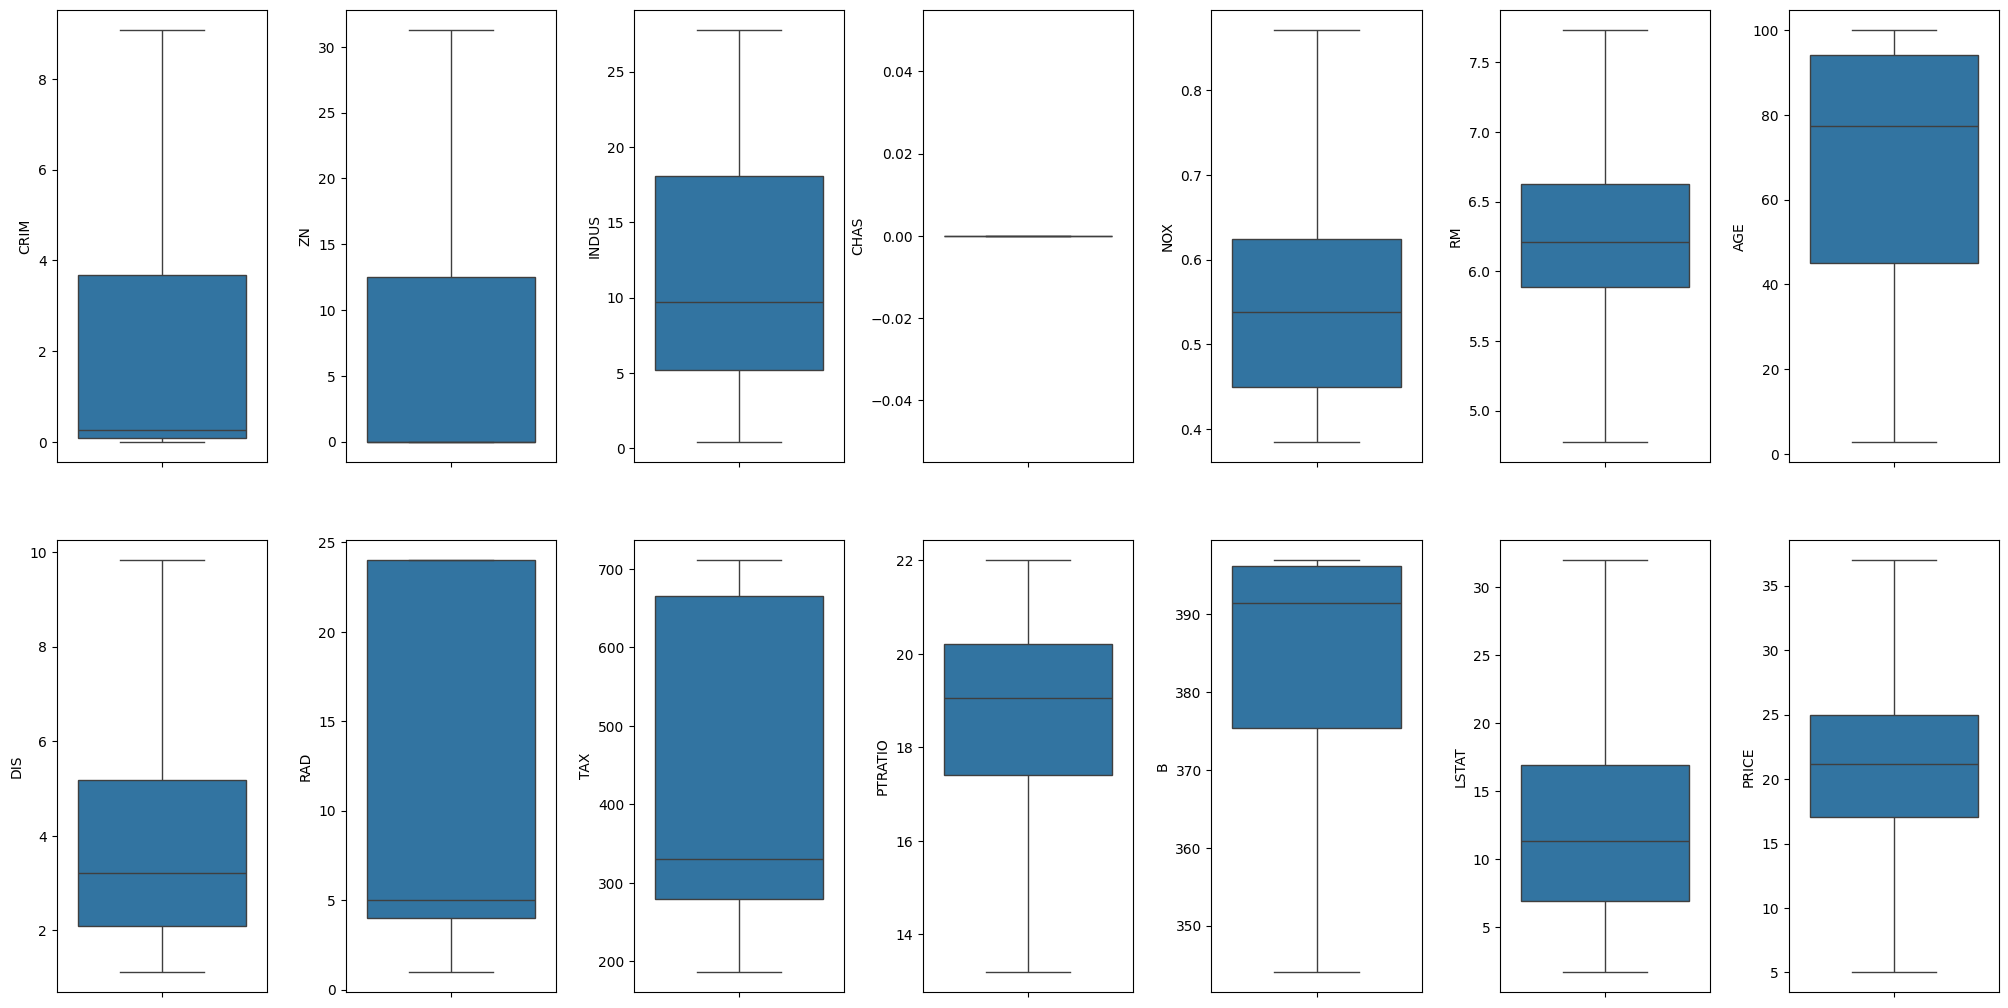

In [561]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_data.items():
    sns.boxplot(y=k, data=boston_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_22992\1357281379.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_22992\1357281379.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Chaitanya\AppData

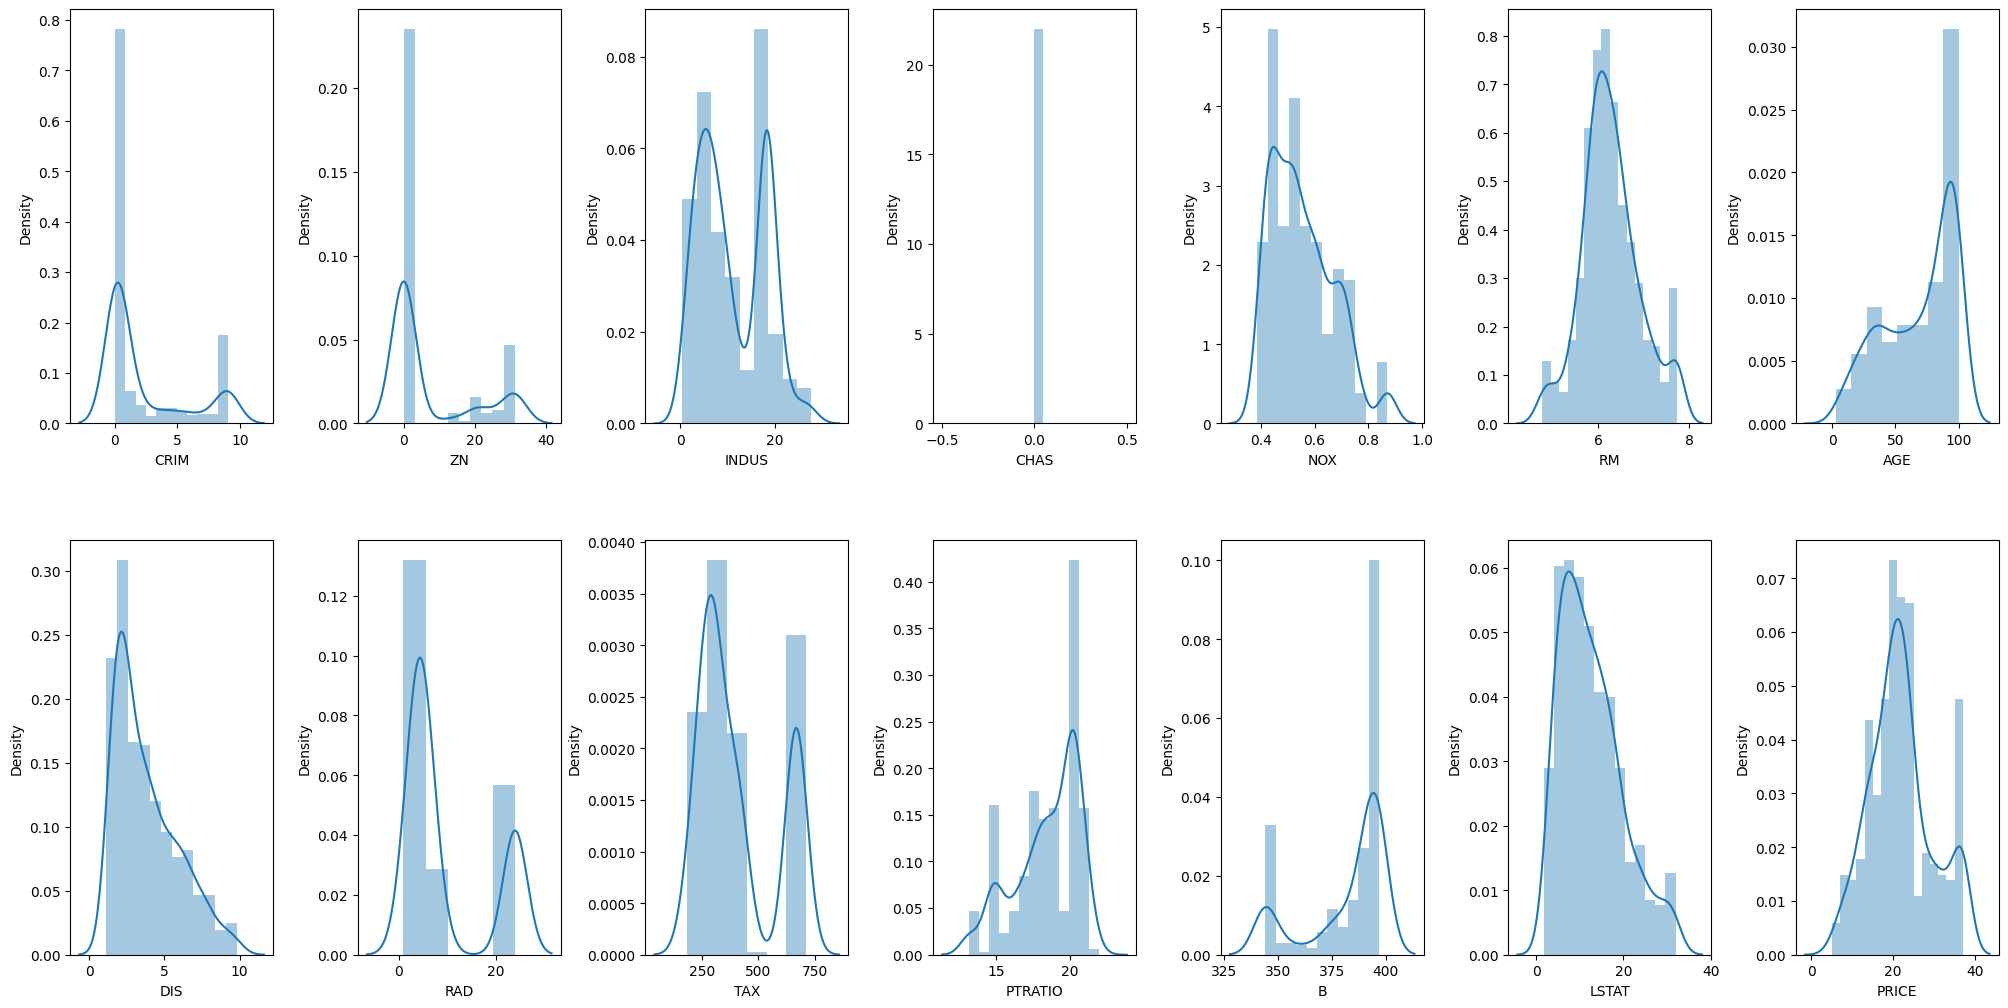

In [562]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [563]:
from sklearn.model_selection import train_test_split
# Separate features and target
X = boston_data.drop('PRICE', axis=1)
y = boston_data['PRICE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [565]:
cols = X_train.columns

In [566]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
174,0.091780,0.00,4.05,0.0,0.510,6.4160,84.1,2.6463,5.0,296.0,16.6,395.50000,9.0400
275,0.056440,31.25,6.41,0.0,0.447,6.7580,32.9,4.0776,4.0,254.0,17.6,396.90000,3.5300
492,0.105740,0.00,27.74,0.0,0.609,5.9830,98.8,1.8681,4.0,711.0,20.1,390.11000,18.0700
73,0.091640,0.00,10.81,0.0,0.413,6.0650,7.8,5.2873,4.0,305.0,19.2,390.91000,5.5200
453,5.090170,0.00,18.10,0.0,0.713,6.2970,91.8,2.3682,24.0,666.0,20.2,385.09000,17.2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,9.069639,0.00,18.10,0.0,0.597,4.7785,100.0,1.5539,24.0,666.0,20.2,344.10625,31.9625
437,9.069639,0.00,18.10,0.0,0.740,6.4610,93.3,2.0026,24.0,666.0,20.2,344.10625,18.0500
412,9.069639,0.00,18.10,0.0,0.597,6.6570,100.0,1.5275,24.0,666.0,20.2,344.10625,21.2200
87,0.051880,0.00,4.49,0.0,0.449,6.0150,45.1,4.4272,3.0,247.0,18.5,395.99000,12.8600


2.ANOVA METHOD

In [567]:
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import SelectKBest


# sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# # display selected feature names
# X_train.columns[sel.get_support()]

In [568]:
# columns = X_train.columns[sel.get_support()]

In [569]:
# X_train = sel.transform(X_train)
# X_test = sel.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=columns)
# X_test = pd.DataFrame(X_test, columns=columns)

In [570]:
# print(X_train.shape)
# print(X_test.shape)

Fearure Selection

In [571]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [572]:
X_train = scaler.fit_transform(X_train)

In [573]:
X_test = scaler.transform(X_test)

In [574]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [575]:
print("training",np.mean(cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

training 0.7683808932519836
testing 0.6109739459881395


In [576]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
exh = EFS(lr, max_features=13, scoring='r2', cv=5, print_progress=True,n_jobs=-1)
sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [577]:
sel.best_score_

0.7698870496068644

In [578]:
sel.best_feature_names_

('0', '4', '5', '7', '8', '9', '10', '11', '12')

In [579]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.29016235541085167, 0.34618944848927535, 0.2...",0.283146,"(0,)",0.079784,0.062075,0.031037
1,"(1,)","[0.054491563294842615, 0.21873412024018912, 0....",0.15509,"(1,)",0.11451,0.089093,0.044546
2,"(2,)","[0.2968875735591192, 0.3300421130547291, 0.330...",0.289663,"(2,)",0.076787,0.059743,0.029871
3,"(3,)","[-0.015107295877620386, -0.006699694187165761,...",-0.007528,"(3,)",0.006644,0.00517,0.002585
4,"(4,)","[0.2302217808574032, 0.291929280739045, 0.2432...",0.230308,"(4,)",0.091227,0.070978,0.035489
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7471160128507588, 0.7666385641850595, 0.802...",0.768381,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.052287,0.040681,0.020341
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7471833787421168, 0.7666604937075249, 0.802...",0.768502,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.052227,0.040634,0.020317
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7539748597112746, 0.7641700090929613, 0.800...",0.768881,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.053463,0.041596,0.020798
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7417407085125631, 0.769478744501524, 0.7998...",0.76029,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.058746,0.045706,0.022853


In [580]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [581]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [582]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7650599942916556, 0.7643062979004375, 0.799...",0.769887,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.053259,0.041437,0.020719,404,9,0.764631
6583,"(0, 4, 5, 7, 8, 9, 10, 12)","[0.7605527085473007, 0.7625560900558974, 0.796...",0.769258,"(0, 4, 5, 7, 8, 9, 10, 12)",0.049831,0.038771,0.019385,404,8,0.764585
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7650599942916555, 0.7643062979004374, 0.799...",0.769887,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.053259,0.041437,0.020719,404,10,0.764032
7564,"(0, 3, 4, 5, 7, 8, 9, 10, 12)","[0.7605527085473005, 0.7625560900558972, 0.796...",0.769258,"(0, 3, 4, 5, 7, 8, 9, 10, 12)",0.049831,0.038771,0.019385,404,9,0.763987
7528,"(0, 2, 4, 5, 7, 8, 9, 10, 12)","[0.7595893859376817, 0.7626838012155487, 0.796...",0.76907,"(0, 2, 4, 5, 7, 8, 9, 10, 12)",0.050152,0.03902,0.01951,404,9,0.763794
...,...,...,...,...,...,...,...,...,...,...
7,"(7,)","[0.06739493091054438, 0.17648646900779963, 0.0...",0.087929,"(7,)",0.070225,0.054638,0.027319,404,1,0.08566
11,"(11,)","[0.1103945842787416, 0.02673711599792572, 0.16...",0.087448,"(11,)",0.065289,0.050797,0.025399,404,1,0.085178
49,"(3, 7)","[0.06739493091054438, 0.17648646900779963, 0.0...",0.087929,"(3, 7)",0.070225,0.054638,0.027319,404,2,0.08338
53,"(3, 11)","[0.1103945842787416, 0.02673711599792572, 0.16...",0.087448,"(3, 11)",0.065289,0.050797,0.025399,404,2,0.082896


In [583]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [584]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7698870496068644
testing 0.6517970096404129


In [585]:
X_train_sel.shape

(404, 9)

In [586]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roami

C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Chaitanya\AppData\Roami

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [587]:
sfs.k_feature_idx_

(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [588]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7471160128507583, 0.7666385641850595, 0.802...",0.768381,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.052287,0.040681,0.020341,404,13,0.76066
12,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7539748597112746, 0.7641700090929613, 0.800...",0.768881,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.053463,0.041596,0.020798,404,12,0.761788
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7640546464814855, 0.7643012872393675, 0.799...",0.769618,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.053352,0.04151,0.020755,404,11,0.763154
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7650599942916555, 0.7643062979004374, 0.799...",0.769887,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.053259,0.041437,0.020719,404,10,0.764032
9,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7650599942916556, 0.7643062979004375, 0.799...",0.769887,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.053259,0.041437,0.020719,404,9,0.764631
8,"(0, 4, 5, 7, 8, 9, 10, 12)","[0.7605527085473007, 0.7625560900558974, 0.796...",0.769258,"(0, 4, 5, 7, 8, 9, 10, 12)",0.049831,0.038771,0.019385,404,8,0.764585
7,"(0, 4, 5, 7, 8, 10, 12)","[0.7483574980601047, 0.7628063533624949, 0.784...",0.7639,"(0, 4, 5, 7, 8, 10, 12)",0.050716,0.039459,0.01973,404,7,0.759727
6,"(0, 4, 5, 7, 10, 12)","[0.7461956705202795, 0.7660988012951759, 0.783...",0.758503,"(0, 4, 5, 7, 10, 12)",0.057093,0.04442,0.02221,404,6,0.754854
5,"(4, 5, 7, 10, 12)","[0.7404723539848864, 0.7655554763934234, 0.778...",0.755329,"(4, 5, 7, 10, 12)",0.052329,0.040713,0.020357,404,5,0.752256
4,"(4, 5, 10, 12)","[0.6991168970727759, 0.748863405184907, 0.7380...",0.730996,"(4, 5, 10, 12)",0.052857,0.041124,0.020562,404,4,0.728299


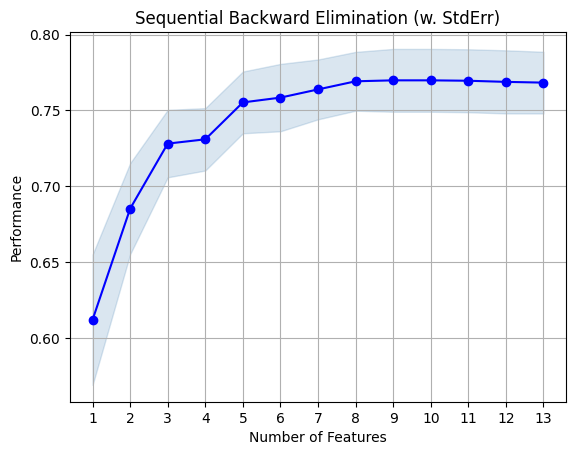

In [589]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [590]:
X_train_sel_B = sfs.transform(X_train)
X_test_sel_B= sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel_B, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel_B, y_test, cv=5, scoring='r2')))

training 0.7698870496068644
testing 0.651797009640413


In [591]:
X_train_sel_B.shape

(404, 10)

In [592]:
import pickle
pickle.dump(sfs,open('scaling.pkl','wb'))

In [593]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [594]:
lasso.coef_

array([-0.63415581,  0.0830488 , -0.11249353,  0.        , -1.02634426,
        2.29790737, -0.1590713 , -1.56409249,  0.26357185, -0.37700455,
       -1.57663235,  0.3426479 , -3.41651876])

<Axes: xlabel='0'>

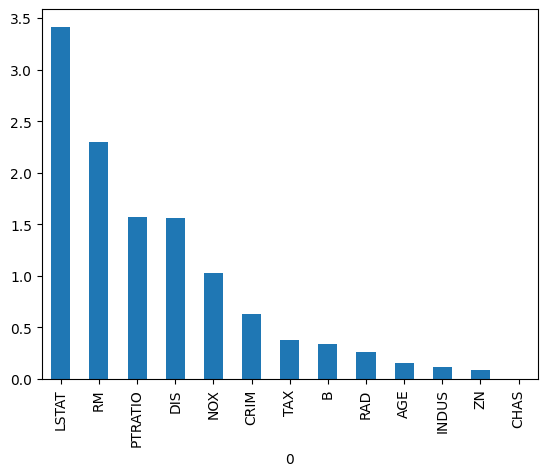

In [595]:
import matplotlib.pyplot as plt
import numpy as np

X_train_scaled = pd.DataFrame(X_train,columns=cols)
X_test_scaled = pd.DataFrame(X_test,columns=cols)
x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

# Model Training

In [596]:
from sklearn.linear_model import LinearRegression


In [597]:
regression = LinearRegression()

In [598]:
regression.fit(X_train_sel_B,y_train)

LinearRegression()

Print the Coefficients

In [599]:
print(regression.coef_)

[-2.12819755e+00 -1.55431223e-15 -1.56230182e+00  2.17913657e+00
 -1.97784569e+00  2.74424686e+00 -1.39275894e+00 -1.97619174e+00
  3.73731875e-01 -3.29358793e+00]


Print the Intercept

In [600]:
print(regression.intercept_)

22.116646039603957


On which parameters the model has been trained

In [601]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Prediction With Test Data

In [602]:
reg_pred = regression.predict(X_test_sel_B)

In [603]:
reg_pred

array([28.50142451, 30.94071319, 15.12659205, 24.93155557, 18.0921422 ,
       23.12147452, 18.436649  , 14.11234235, 22.52517904, 20.95103631,
       22.3286149 , 20.2940787 ,  3.52480146, 22.15758836, 20.24224428,
       24.31957617, 19.68257787,  5.04168759, 36.232556  , 15.06252008,
       26.13950787, 28.19680347, 12.11390895, 23.0488276 , 16.1778883 ,
       13.7970422 , 23.10677815, 15.39788633, 20.12891059, 19.85858153,
       22.98925869, 25.2024888 , 22.59229278, 18.53296399, 16.35735818,
       17.53493784, 30.26082349, 21.19914112, 21.16343093, 24.26282171,
       15.23421797, 30.39808367, 36.768346  , 18.68645142, 26.61709603,
       15.72444198, 14.4517638 , 25.43711307, 19.95766485, 29.1933734 ,
       22.69162077, 33.09935161, 16.30850879, 25.45832321, 36.73796941,
       22.47223329, 17.96354863, 29.54031023, 25.05486243, 15.24874795,
       23.45611851, 28.54683226, 30.47070166, 16.67314362, 21.99210258,
       15.18016006, 17.42274228, 25.43499517, 28.07583782, 15.43

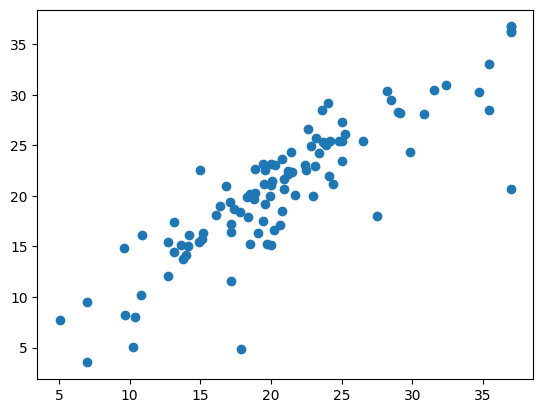

In [604]:
plt.scatter(y_test,reg_pred)

In [605]:
residuals = y_test - reg_pred

In [606]:
residuals

174    -4.901425
275     1.459287
492    -1.526592
73     -2.131556
453    -1.992142
         ...    
413    13.001017
437    -5.298253
412     0.771544
87     -0.059816
76     -2.937971
Name: PRICE, Length: 102, dtype: float64

<Axes: xlabel='PRICE', ylabel='Count'>

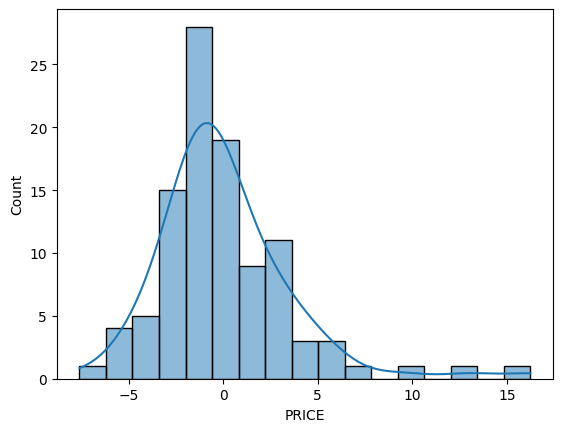

In [607]:
sns.histplot(residuals, kde=True)

In [608]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))
print(mean_absolute_error(y_test,reg_pred))

12.056551213365012
3.4722544856857787
2.4246458033087634


In [609]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)

In [610]:
print((score))

0.7535704950413276


In [611]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.717166136354251

New Data Prediction

In [612]:
X_test_sel_B[0].reshape(1,-1)

array([[-0.6398798 ,  0.        , -0.39541229,  0.18027214, -0.5494668 ,
        -0.50779731, -0.65092617, -0.78477567,  0.72105192, -0.48343237]])

In [613]:
regression.predict(X_test_sel_B[0].reshape(1,-1))

array([28.50142451])

Pickling The Model file For Deployment

In [614]:
import pickle

In [615]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [616]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [619]:
pickled_model.predict(X_test_sel_B[0].reshape(1,-1))

array([28.50142451])

In [618]:
y_test

174    23.6
275    32.4
492    13.6
73     22.8
453    16.1
       ... 
413    17.9
437     9.6
412    17.2
87     22.5
76     21.4
Name: PRICE, Length: 102, dtype: float64